In [131]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [132]:
df=pd.read_csv('fetal_health.csv')

In [133]:
df.drop_duplicates(inplace=True)

In [134]:
df.drop('histogram_tendency',axis=1,inplace=True)

In [135]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,2.0


In [136]:
df.shape

(2113, 21)

In [137]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'fetal_health'],
      dtype='object')

In [138]:
X=df.drop('fetal_health',axis=1).values
y=df['fetal_health'].values

In [139]:
print('features shape' ,X.shape)
print('Target shape' ,y.shape)

features shape (2113, 20)
Target shape (2113,)


In [140]:
y

array([2., 1., 1., ..., 2., 2., 1.])

In [141]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% test, 80% train (change as you like)
    random_state=42, # for reproducibility
    stratify=y       # if classification and want balanced splits, else omit
)


In [142]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [143]:
X_train

array([[-1.21467796e-01, -5.64169830e-01, -2.07204845e-01, ...,
        -2.88588551e-01, -6.12824277e-02,  4.35340327e-01],
       [-5.28972662e-01,  1.24013649e+00, -1.22533912e-04, ...,
        -4.81208871e-01, -1.30052217e-01,  1.06695442e+00],
       [-3.25220229e-01, -8.21927876e-01, -2.08307650e-02, ...,
        -4.81208871e-01, -5.42670954e-01, -6.17349832e-01],
       ...,
       [-1.14022996e+00, -8.21927876e-01, -2.07204845e-01, ...,
        -4.81208871e-01, -7.48980322e-01, -5.12080816e-01],
       [ 9.99170583e-01,  2.09104308e-01, -2.07204845e-01, ...,
         9.31340144e-01,  9.70264414e-01,  3.65160983e-01],
       [ 4.89789502e-01,  3.55995891e+00, -2.07204845e-01, ...,
         1.44499433e+00,  1.58919252e+00,  1.87401688e+00]])

In [144]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
X_train=pt.fit_transform(X_train)

In [145]:
X_train

array([[-0.11909671, -0.45680154, -0.63011824, ..., -0.39044692,
        -0.14251188,  1.15915096],
       [-0.52737305,  1.30300458,  1.67030676, ..., -0.56893145,
        -0.21073935,  1.50443665],
       [-0.32312758, -1.00397805,  1.55575717, ..., -0.56893145,
        -0.60213123, -1.05859325],
       ...,
       [-1.14114266, -1.00397805, -0.63011824, ..., -0.56893145,
        -0.78843275, -0.64565403],
       [ 0.99896818,  0.63412215, -0.63011824, ...,  0.96126722,
         0.99311285,  1.10120963],
       [ 0.49150105,  2.00490219, -0.63011824, ...,  1.6294268 ,
         1.75172269,  1.72576818]])

In [146]:
X_test=pt.transform(X_test)

In [147]:
pt.lambdas_

array([  0.99318979,  -0.1415825 ,  -6.18955015,   0.92665765,
        -0.84859234, -82.29911426,  -6.4660019 ,   0.99618088,
         0.20235759,  -1.47753567,   0.47100347,   0.7159729 ,
         0.9193264 ,   0.71246763,   0.39551038,  -2.32615703,
         1.34327366,   1.30667619,   1.23160055,  -0.98718128])

In [148]:
X_train

array([[-0.11909671, -0.45680154, -0.63011824, ..., -0.39044692,
        -0.14251188,  1.15915096],
       [-0.52737305,  1.30300458,  1.67030676, ..., -0.56893145,
        -0.21073935,  1.50443665],
       [-0.32312758, -1.00397805,  1.55575717, ..., -0.56893145,
        -0.60213123, -1.05859325],
       ...,
       [-1.14114266, -1.00397805, -0.63011824, ..., -0.56893145,
        -0.78843275, -0.64565403],
       [ 0.99896818,  0.63412215, -0.63011824, ...,  0.96126722,
         0.99311285,  1.10120963],
       [ 0.49150105,  2.00490219, -0.63011824, ...,  1.6294268 ,
         1.75172269,  1.72576818]])

In [149]:
X_test

array([[ 0.49150105, -1.00397805,  0.66166997, ...,  0.27332187,
         0.21423866, -0.52004486],
       [ 0.08468173, -1.00397805, -0.63011824, ..., -0.95993042,
        -0.78843275,  1.5302728 ],
       [ 1.91029373, -1.00397805, -0.63011824, ...,  1.7162266 ,
         1.66513212, -1.05859325],
       ...,
       [-0.52737305,  1.17501208,  0.39802265, ..., -0.00634123,
        -0.14251188, -0.52004486],
       [ 0.99896818,  1.17501208,  2.17845269, ...,  0.80208918,
         0.67244948, -0.52004486],
       [-0.32312758,  1.41519061, -0.63011824, ...,  0.27332187,
         0.67244948,  1.79842886]])

In [150]:
print("Means:", scaler.mean_)
print("Standard deviations:", scaler.scale_)
print('train  shape' ,X_train.shape)
print('Train Target shape' ,y_train.shape)
print('Test  shape' ,X_test.shape)
print('Test target shape' ,y_test.shape)


Means: [1.33192308e+02 3.18875740e-03 1.00059172e-02 4.35857988e-03
 1.82781065e-03 4.14201183e-06 1.70414201e-04 4.67810651e+01
 1.33177515e+00 9.88757396e+00 8.18437870e+00 6.97201183e+01
 9.39585799e+01 1.63678698e+02 4.04792899e+00 3.20118343e-01
 1.37270414e+02 1.34494675e+02 1.37891124e+02 1.85934911e+01]
Standard deviations: [9.81583372e+00 3.87960731e-03 4.82899768e-02 2.91990725e-03
 2.85869305e-03 6.42250385e-05 6.20612748e-04 1.73130760e+01
 8.80903139e-01 1.82107751e+01 5.58886401e+00 3.84930072e+01
 2.93094397e+01 1.75624420e+01 2.90246964e+00 7.10785871e-01
 1.64279208e+01 1.55746808e+01 1.45412689e+01 2.84984140e+01]
train  shape (1690, 20)
Train Target shape (1690,)
Test  shape (423, 20)
Test target shape (423,)


In [151]:
import pandas as pd

# Your column names (features + target)
columns = ['baseline value', 'accelerations', 'fetal_movement',
           'uterine_contractions', 'light_decelerations', 'severe_decelerations',
           'prolongued_decelerations', 'abnormal_short_term_variability',
           'mean_value_of_short_term_variability',
           'percentage_of_time_with_abnormal_long_term_variability',
           'mean_value_of_long_term_variability', 'histogram_width',
           'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
           'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
           'histogram_median', 'histogram_variance', 'fetal_health']

feature_names = columns[:-1]
target_name = columns[-1]

# Convert to DataFrames / Series
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)
y_train_df = pd.Series(y_train, name=target_name)
y_test_df = pd.Series(y_test, name=target_name)



In [152]:
feature_names

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance']

In [153]:
target_name

'fetal_health'

In [154]:
X_train_df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance
0,-0.119097,-0.456802,-0.630118,0.244703,1.423618,-0.064492,-0.309805,-0.969281,0.785034,0.293312,1.781240,0.809448,-1.463537,-0.700180,1.076623,-0.551171,-0.005086,-0.390447,-0.142512,1.159151
1,-0.527373,1.303005,1.670307,-0.446482,1.423618,-0.064492,-0.309805,-0.969281,0.874810,-0.741394,-0.816143,1.683418,-1.280622,1.764154,2.058773,-0.551171,-0.133338,-0.568931,-0.210739,1.504437
2,-0.323128,-1.003978,1.555757,1.233930,-0.799738,-0.064492,-0.309805,1.512749,1.040468,1.052553,-1.479701,-1.163884,1.023801,-0.700180,-0.682823,-0.551171,-0.656184,-0.568931,-0.602131,-1.058593
3,0.998968,-1.003978,-0.630118,-0.801963,-0.799738,-0.064492,-0.309805,1.052117,-1.189715,-0.741394,0.368181,-1.294790,1.184577,-0.632718,-0.682823,1.778778,0.265939,0.494239,0.439658,-1.058593
4,1.100348,-1.003978,-0.630118,-1.527185,-0.799738,-0.064492,-0.309805,0.879282,-1.189715,0.293312,-0.255033,-1.697831,1.786983,-0.179979,-1.219266,-0.551171,1.015817,1.373258,1.240606,-1.208729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,-0.731805,-1.003978,-0.630118,-0.097096,-0.799738,-0.064492,-0.309805,-0.853474,-0.390885,0.125078,0.694786,-1.034797,0.567420,-1.408047,-1.219266,-0.551171,-0.763161,-0.683962,-0.788433,-0.914792
1686,-1.141143,-1.003978,2.178453,-0.446482,1.423618,-0.064492,-0.309805,-1.432756,2.280427,-0.741394,1.244006,1.857149,-1.536998,1.848617,1.076623,-0.551171,-1.118392,-1.323711,-1.376475,0.926663
1687,-1.141143,-1.003978,-0.630118,-0.097096,-0.799738,-0.064492,-0.309805,-1.374801,0.588241,-0.493448,1.448921,-0.720493,0.600361,-0.632718,-0.682823,-0.551171,-0.815650,-0.568931,-0.788433,-0.645654
1688,0.998968,0.634122,-0.630118,0.244703,0.750101,-0.064492,-0.309805,-1.432756,0.785034,-0.741394,0.740155,0.485881,0.200849,1.143431,0.535528,-0.551171,0.858403,0.961267,0.993113,1.101210


In [155]:
X_test_df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance
0,0.491501,-1.003978,0.661670,-1.527185,-0.799738,-0.064492,-0.309805,-0.506226,0.094811,-0.741394,1.401918,0.461908,-0.774643,-0.434361,0.198384,-0.551171,0.336495,0.273322,0.214239,-0.520045
1,0.084682,-1.003978,-0.630118,0.908876,1.606878,-0.064492,-0.309805,-1.548679,1.117349,-0.061372,1.231510,1.114428,-1.536998,0.061525,1.076623,1.778778,-0.763161,-0.959930,-0.788433,1.530273
2,1.910294,-1.003978,-0.630118,-0.801963,-0.799738,-0.064492,-0.309805,0.821657,-1.415437,1.862639,-0.121834,-0.720493,0.991517,0.119674,0.198384,-0.551171,1.592697,1.716227,1.665132,-1.058593
3,0.186472,0.634122,-0.630118,-0.446482,1.282355,-0.064492,-0.309805,-1.258909,0.479388,-0.741394,0.314873,0.058137,-0.106094,-0.242431,-0.208320,-0.551171,-0.195540,-0.139063,-0.210739,0.023835
4,-1.141143,-0.456802,-0.630118,-0.446482,-0.799738,-0.064492,-0.309805,-1.490715,0.785034,-0.267164,1.206357,-0.331630,0.234527,-0.499792,-0.208320,-0.551171,-0.763161,-0.683962,-0.788433,-0.645654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.998968,0.850050,1.928510,-0.446482,-0.799738,-0.064492,-0.309805,-0.448379,0.588241,-0.741394,0.504368,1.585159,-1.171400,1.678748,1.514326,1.778778,0.628978,0.961267,0.831387,-0.177427
419,-1.038754,-1.003978,-0.630118,-1.527185,-0.799738,-0.064492,-0.309805,1.397624,-1.651316,1.868687,-0.738623,-1.427454,0.567420,-2.326601,-1.219266,-0.551171,-0.918785,-0.796209,-0.969701,-1.208729
420,-0.527373,1.175012,0.398023,-0.446482,-0.799738,-0.064492,-0.309805,-0.159285,-0.055939,-0.741394,0.066920,-0.216958,0.633244,0.451081,0.823056,-0.551171,-0.133338,-0.006341,-0.142512,-0.520045
421,0.998968,1.175012,2.178453,-1.527185,-0.799738,-0.064492,-0.309805,-0.159285,0.234132,-0.741394,0.725123,0.854041,-0.454962,1.002341,0.823056,-0.551171,0.480739,0.802089,0.672449,-0.520045


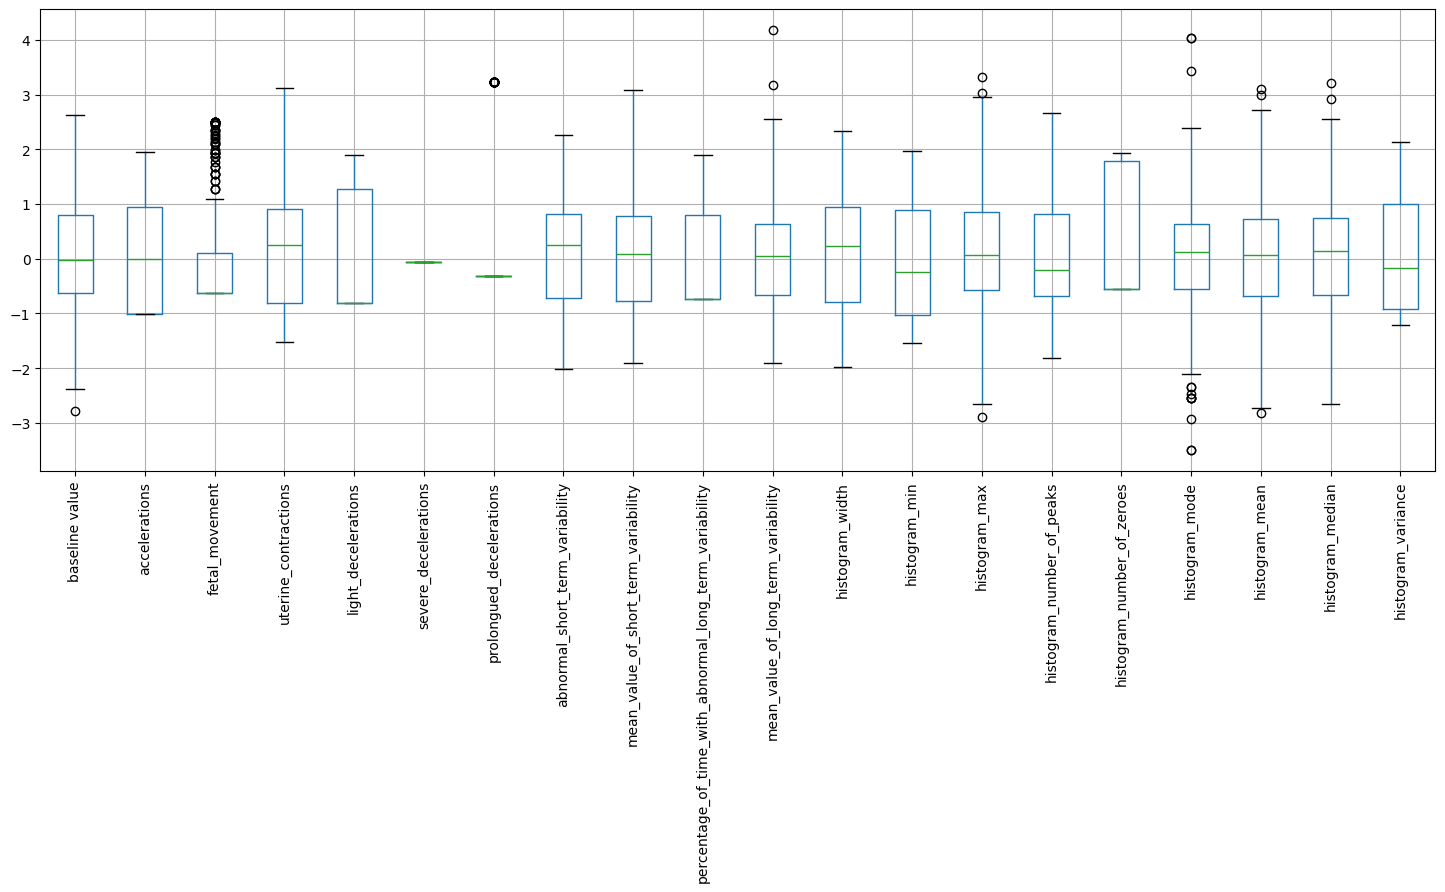

In [156]:
plt.figure(figsize=(18,6))
X_test_df.boxplot()
plt.xticks(rotation=90)
plt.show()

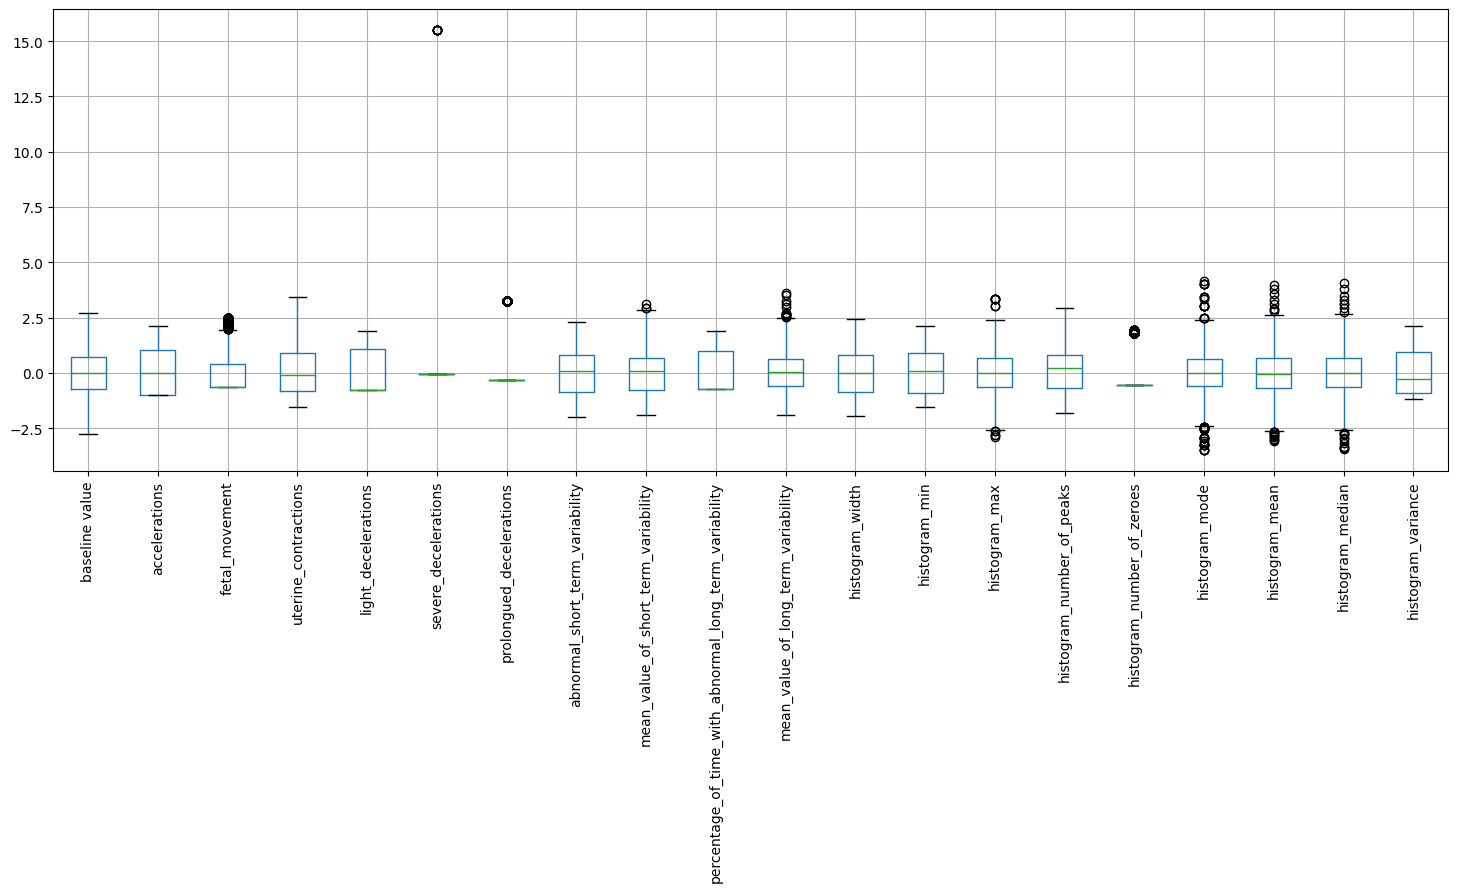

In [157]:
plt.figure(figsize=(18,6))
X_train_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [158]:
drop_columns = ['fetal_movement', 'severe_decelerations',
           'prolongued_decelerations', 'histogram_number_of_zeroes']

In [159]:
X_test_df.drop(columns=drop_columns,axis=1,inplace=True)

In [160]:
X_train_df.drop(columns=drop_columns,axis=1,inplace=True)

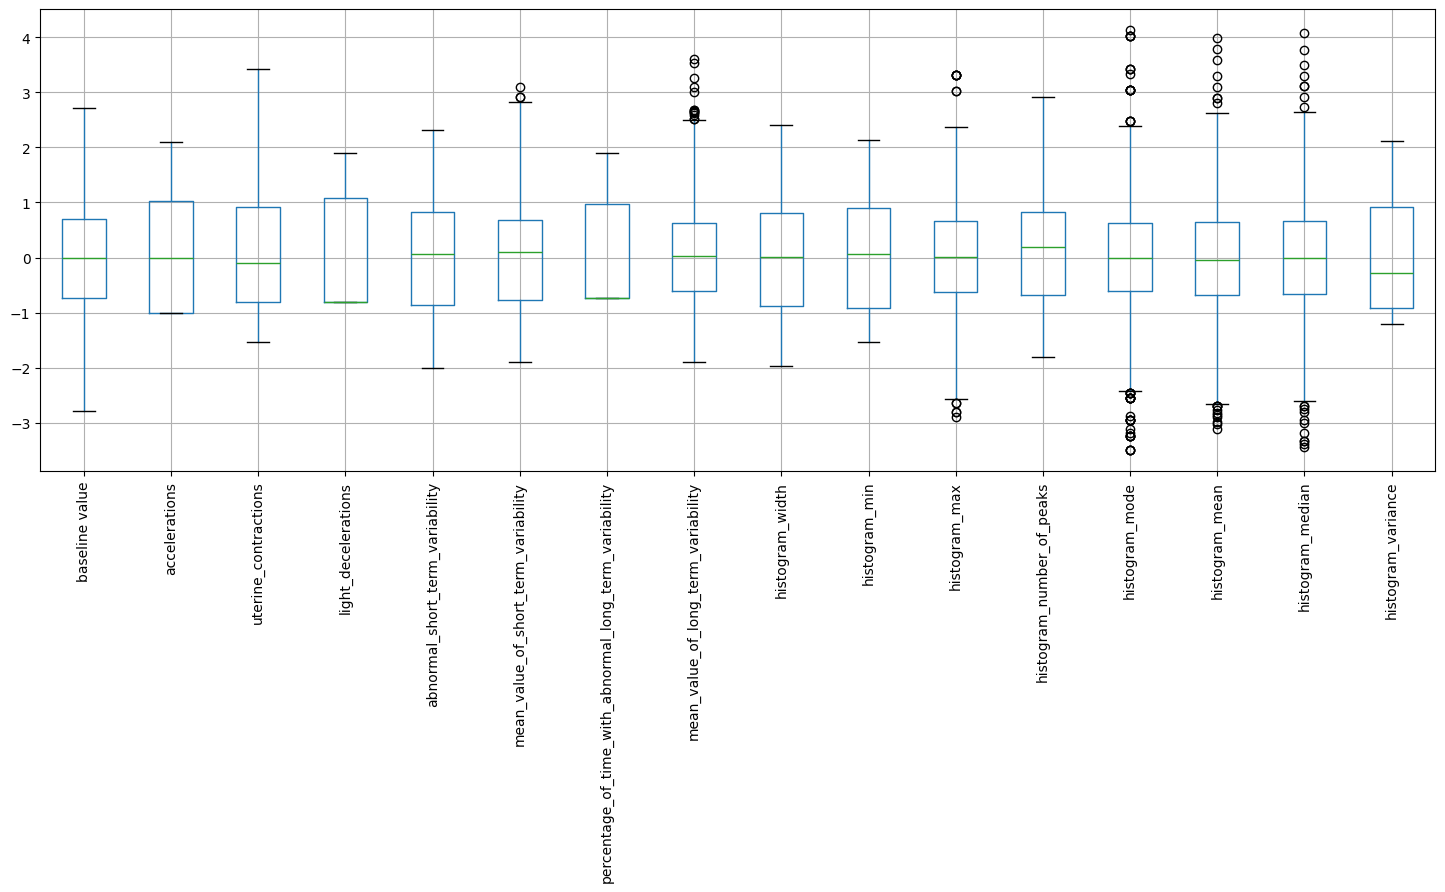

In [161]:
plt.figure(figsize=(18,6))
X_train_df.boxplot()
plt.xticks(rotation=90)
plt.show()

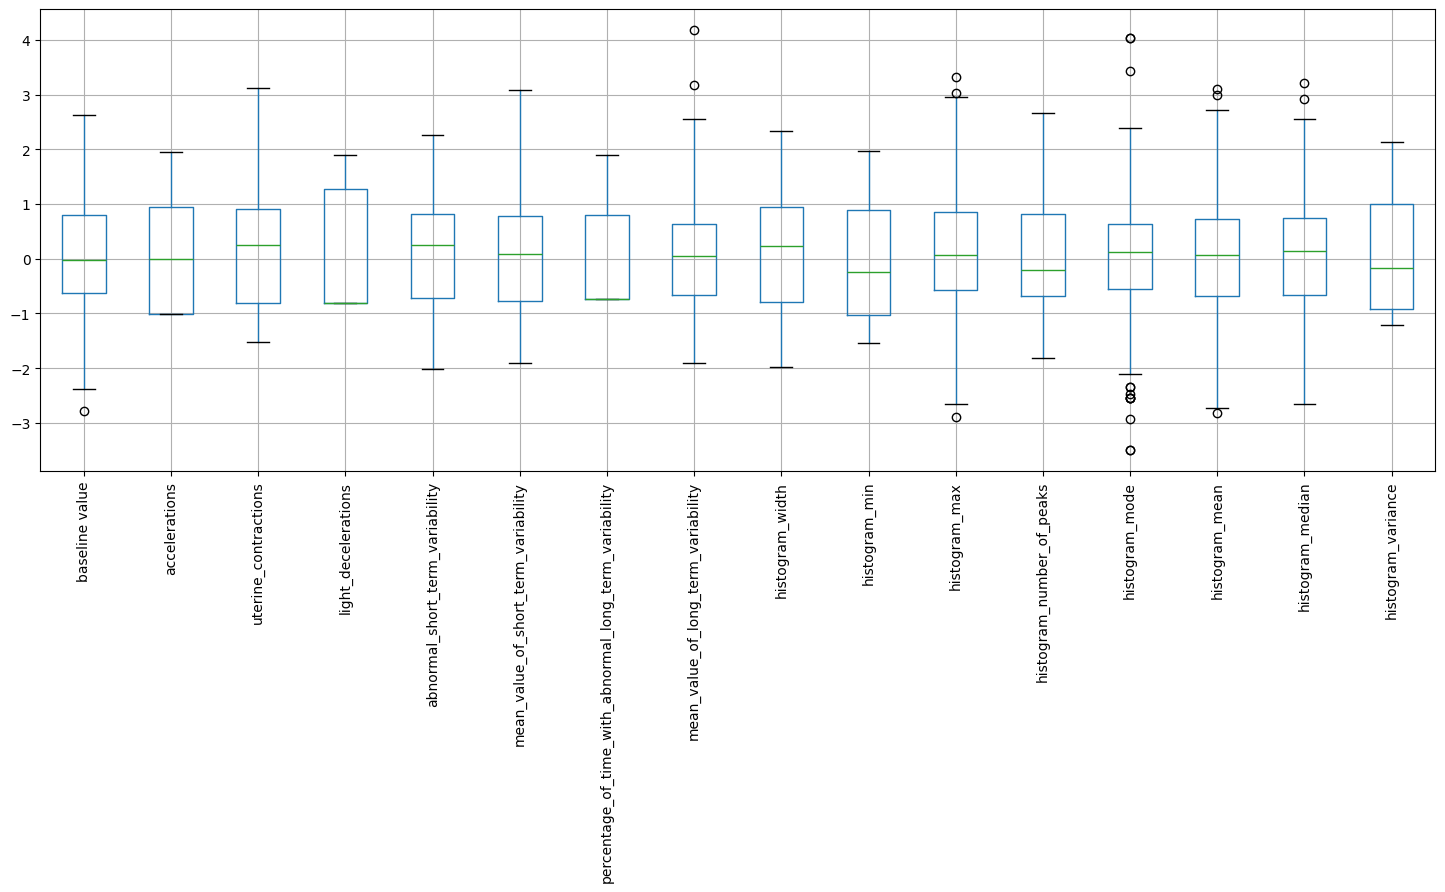

In [162]:
plt.figure(figsize=(18,6))
X_test_df.boxplot()
plt.xticks(rotation=90)
plt.show()

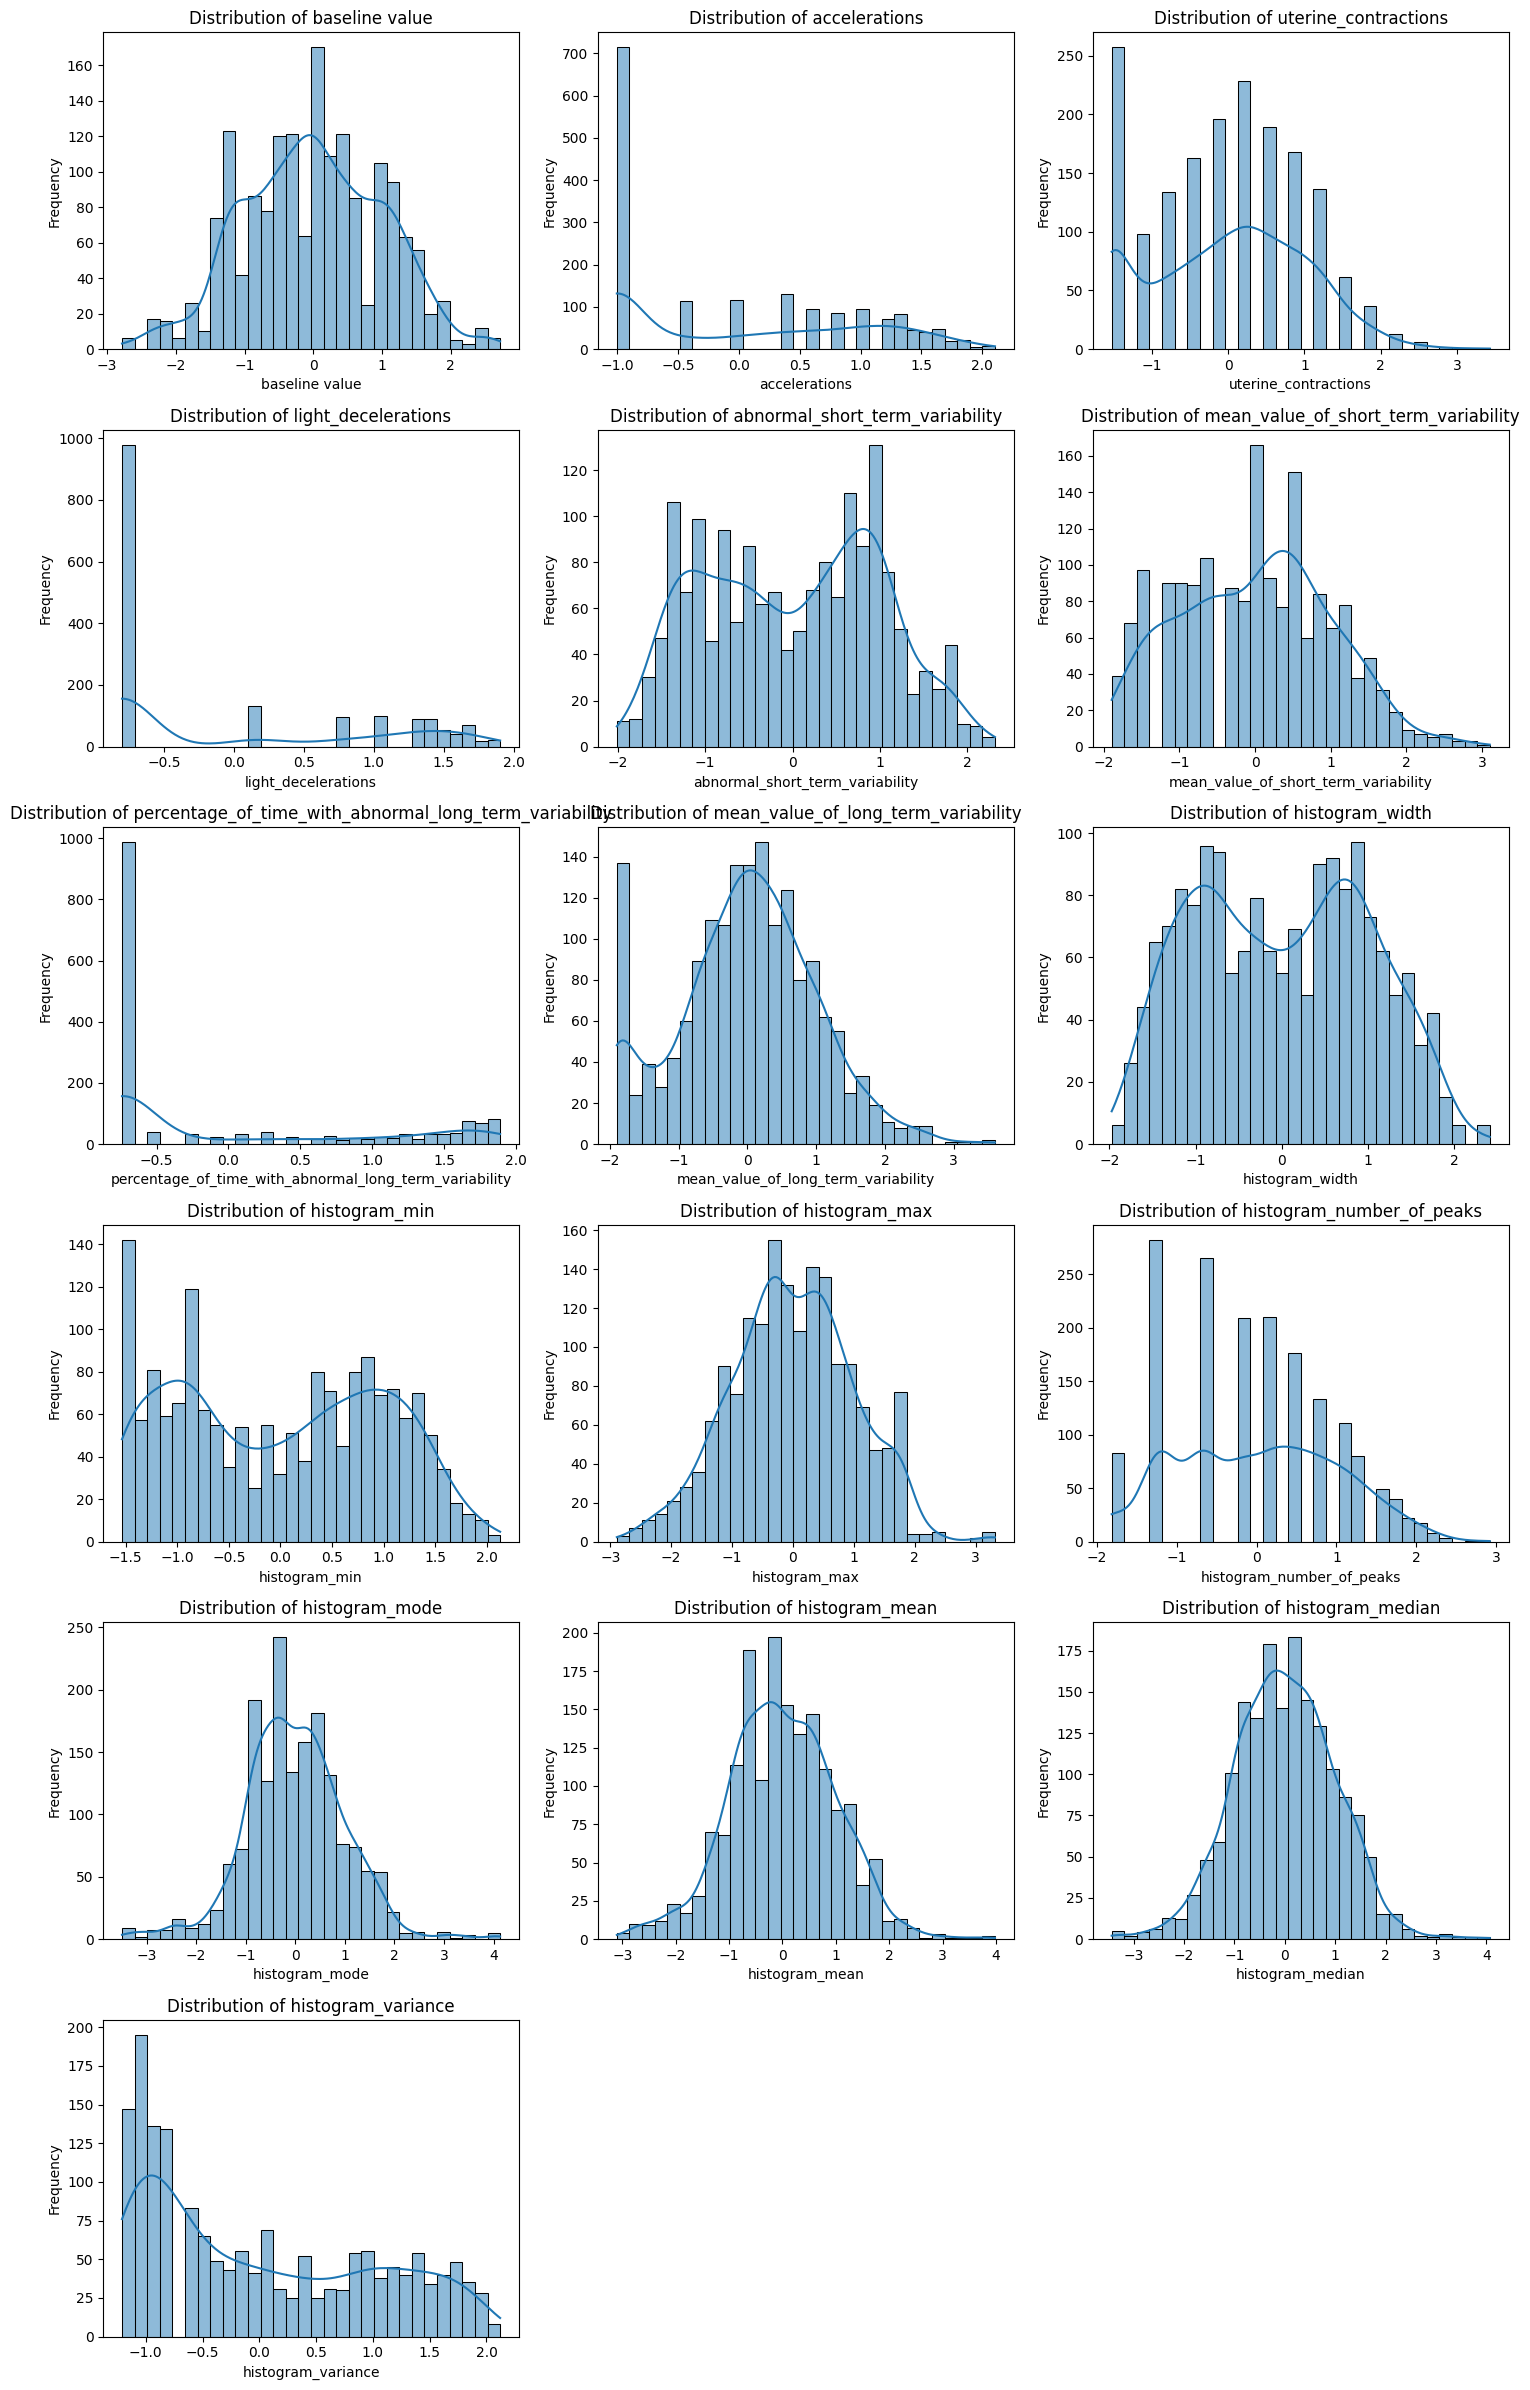

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Select only numerical columns
num_cols = X_train_df.select_dtypes(include=['int64', 'float64']).columns

# Grid settings
cols_per_row = 3
rows = math.ceil(len(num_cols) / cols_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
axes = axes.flatten()  # Flatten to make indexing easy

# Plot each numeric column
for i, col in enumerate(num_cols):
    sns.histplot(X_train_df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any empty subplot slots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


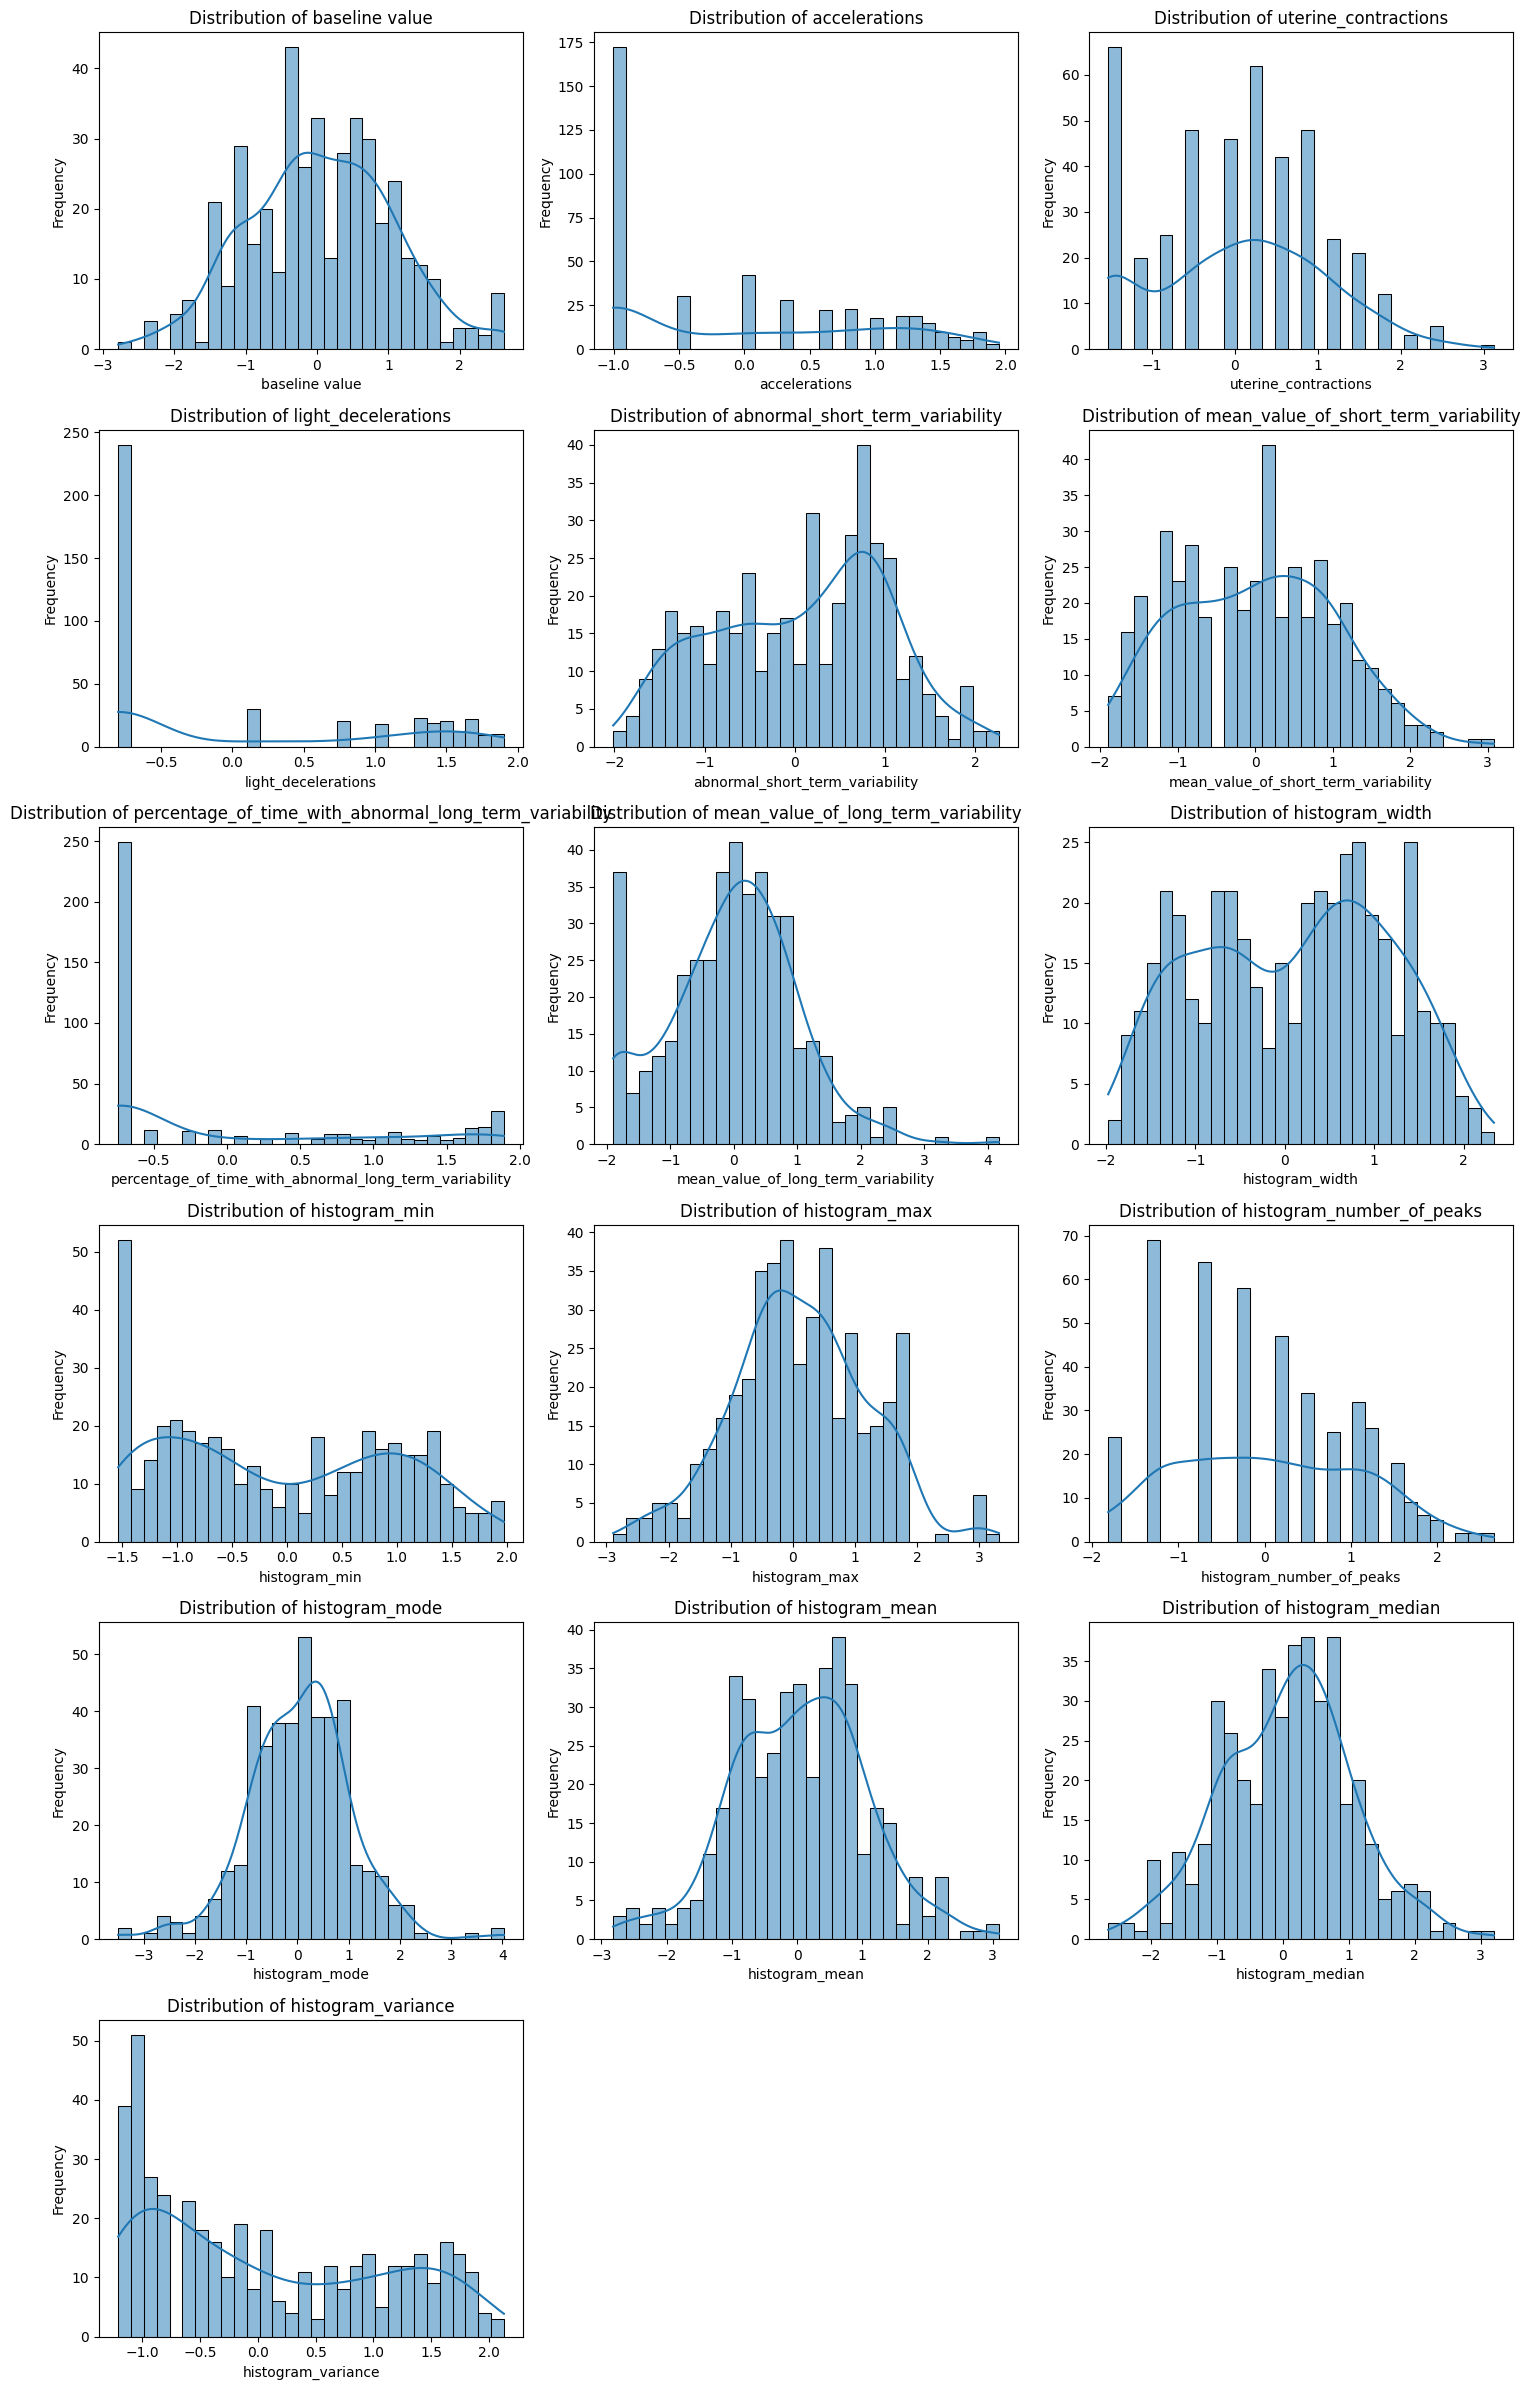

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Select only numerical columns
num_cols = X_test_df.select_dtypes(include=['int64', 'float64']).columns

# Grid settings
cols_per_row = 3
rows = math.ceil(len(num_cols) / cols_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
axes = axes.flatten()  # Flatten to make indexing easy

# Plot each numeric column
for i, col in enumerate(num_cols):
    sns.histplot(X_test_df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Hide any empty subplot slots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [165]:
# Save to CSV
X_train_df.to_csv('X_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)
